**Dataset Description: Child Birth Weight and Gestation Details**

This dataset was compiled to investigate the influence of various factors on a child's birth weight (in ounces). It includes demographic and health information pertaining to the mothers, as well as details related to the pregnancy period. The primary goal is to understand the relationships between these features and to develop models for predicting birth weight.

**Summary of Dataset Features:**

Below is a description and summary of each column in the dataset:

* **case ID number:** A unique identifier assigned to each birth event (case). It is generally not used directly in analyses but is important for tracking records.

* **bwt (Birthweight):** The weight of the baby at birth, expressed in **ounces**.

* **gestation:** The total length of the pregnancy, indicated in **days**. Longer gestation periods are generally expected to correlate with higher birth weights.

* **parity (Parity - First Pregnancy Indicator):** A **binary** variable indicating whether the mother's current pregnancy was her first.
    * **0:** The mother's current pregnancy was not her first, meaning she has given birth previously.
    * **1:** The mother's current pregnancy was her first.
    First pregnancies may have different effects on birth weight.

* **age (Mother's Age):** The age of the mother at the time of birth, expressed in **years**. Maternal age is known to potentially influence birth outcomes.

* **height (Mother's Height):** The height of the mother, measured in **inches**. The mother's physical characteristics may be related to birth weight.

* **weight (Mother's Weight):** The mother's weight prior to pregnancy or at a specific stage of pregnancy, expressed in **pounds**. The mother's weight can be a significant factor in the baby's development.

* **smoke (Smoking Status Indicator):** A **binary** variable indicating whether the mother smoked during pregnancy.
    * **0:** The mother did not smoke.
    * **1:** The mother smoked.
    Smoking during pregnancy is widely known to be associated with lower birth weights.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Load the dataset

In [3]:
df = pd.read_csv(r'D:\Hackathon um6p\hackaton\ikram\babies.csv') 

In [4]:
df.head()

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   int64  
 1   bwt        1236 non-null   int64  
 2   gestation  1223 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1234 non-null   float64
 5   height     1214 non-null   float64
 6   weight     1200 non-null   float64
 7   smoke      1226 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 77.4 KB


In [6]:
df.describe()

,case,bwt,gestation,parity,age,height,weight,smoke
count,1236.000000,1236.000000,1223.000000,1236.000000,1234.000000,1214.000000,1200.000000,1226.000000
mean,618.500000,119.576861,279.338512,0.254854,27.255267,64.047776,128.625833,0.394780
std,356.946775,18.236452,16.027693,0.435956,5.781405,2.533409,20.971862,0.489003
min,1.000000,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,309.750000,108.750000,272.000000,0.000000,23.000000,62.000000,114.750000,0.000000
50%,618.500000,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,927.250000,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,1236.000000,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


# --- 1. Data Preprocessing ---

## Handle potential missing values

In [7]:
for col in df.select_dtypes(include=['number']).columns:
    df.fillna({col: df[col].mean()}, inplace=True)
df.isnull().sum()

case         0
bwt          0
gestation    0
parity       0
age          0
height       0
weight       0
smoke        0
dtype: int64

# Define features (X) and target (y)

In [8]:
X = df[['gestation', 'parity', 'age', 'height', 'weight', 'smoke']]
y = df['bwt']

# Split data into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=537)


# --- 2. Machine Learning Models ---

# a) Linear Regression

In [10]:
print("\n--- Linear Regression ---")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print(f"Mean Squared Error: {lr_mse:.2f}")
print(f"R-squared: {lr_r2:.2f}")


--- Linear Regression ---
Mean Squared Error: 286.55
R-squared: 0.29


# Scatter plot of predictions vs. actual values

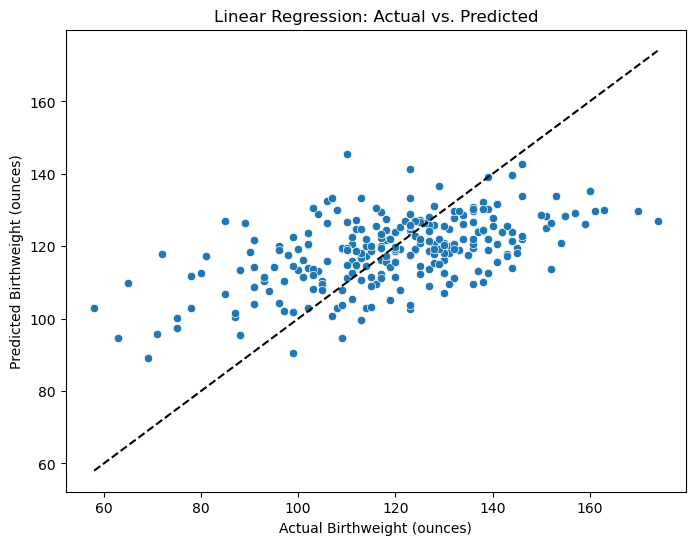

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=lr_predictions)
plt.xlabel("Actual Birthweight (ounces)")
plt.ylabel("Predicted Birthweight (ounces)")
plt.title("Linear Regression: Actual vs. Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--') # Diagonal line for perfect predictions
plt.show()

# b) Random Forest Regressor

In [12]:
print("\n--- Random Forest Regressor ---")
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Mean Squared Error: {rf_mse:.2f}")
print(f"R-squared: {rf_r2:.2f}")


--- Random Forest Regressor ---
Mean Squared Error: 318.26
R-squared: 0.21


# Feature Importance (for Random Forest)

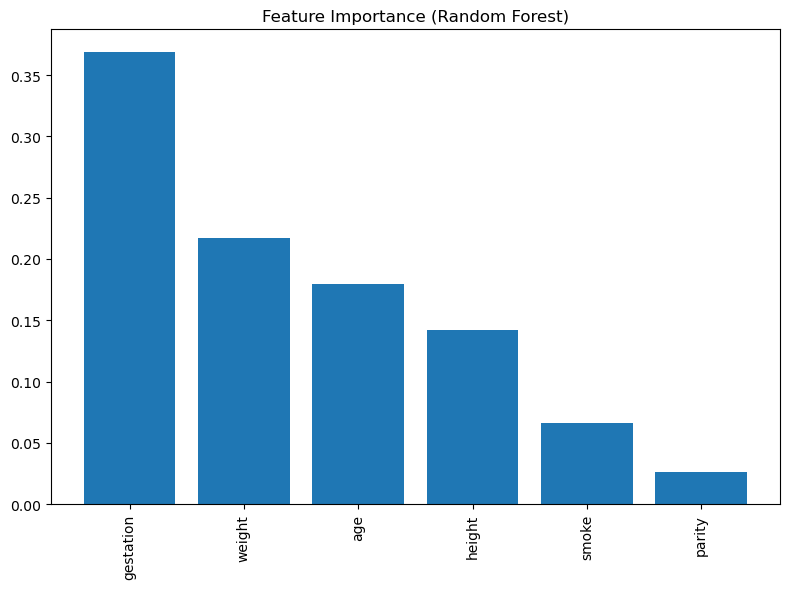

In [13]:
feature_importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = feature_importances.argsort()[::-1]

plt.figure(figsize=(8, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# c) Gradient Boosting Regressor

In [14]:
print("\n--- Gradient Boosting Regressor ---")
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
print(f"Mean Squared Error: {gb_mse:.2f}")
print(f"R-squared: {gb_r2:.2f}")



--- Gradient Boosting Regressor ---
Mean Squared Error: 286.10
R-squared: 0.29


# Scatter plot of predictions vs. actual values (Gradient Boosting)

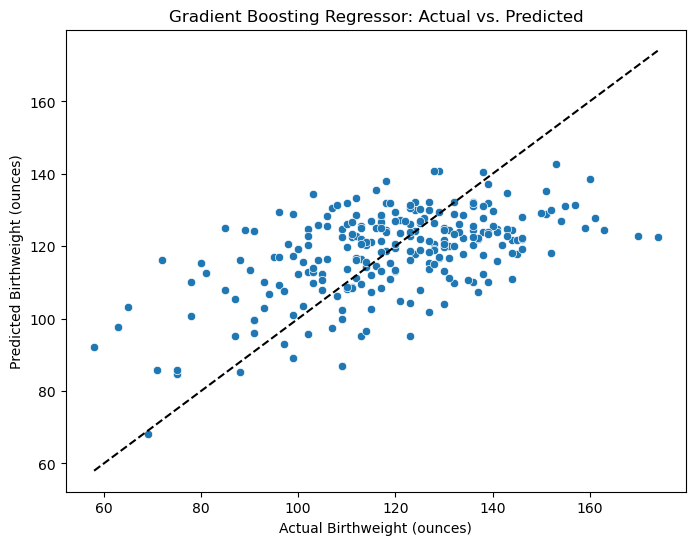

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=gb_predictions)
plt.xlabel("Actual Birthweight (ounces)")
plt.ylabel("Predicted Birthweight (ounces)")
plt.title("Gradient Boosting Regressor: Actual vs. Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--') # Diagonal line for perfect predictions
plt.show()

# --- 3. Model Comparison ---

In [16]:
print("\n--- Model Comparison ---")
print("Linear Regression - MSE:", lr_mse, ", R-squared:", lr_r2)
print("Random Forest Regressor - MSE:", rf_mse, ", R-squared:", rf_r2)
print("Gradient Boosting Regressor - MSE:", gb_mse, ", R-squared:", gb_r2)


--- Model Comparison ---
Linear Regression - MSE: 286.5480807125634 , R-squared: 0.2930777740001075
Random Forest Regressor - MSE: 318.2615237903226 , R-squared: 0.21483981226293258
Gradient Boosting Regressor - MSE: 286.0967716752785 , R-squared: 0.2941911661696097


**Analysis of Birth Weight Prediction using Machine Learning Regression Models**

This analysis involved the application of various machine learning regression models to a dataset containing birth weight and gestation details. The objective was to model the factors influencing birth weight and evaluate the predictive performance of these models.

**Steps Undertaken:**

1.  **Data Preparation:** The dataset was ingested, and missing values in numerical variables were imputed using the mean of the respective columns. Independent and dependent variables were defined, and the dataset was partitioned into training and testing subsets for model training and evaluation.

2.  **Model Development and Evaluation:**
    * **Linear Regression Model:** A fundamental regression model, linear regression, was implemented, and its predictive accuracy was measured using the Mean Squared Error (MSE) and R-squared (coefficient of determination) metrics. The relationship between the predicted and actual values was visually examined.
    * **Random Forest Regression Model:** Random Forest regression, an ensemble learning method capable of capturing more complex relationships, was employed, and its performance was assessed using similar metrics. Additionally, the relative importance of input variables in the model's decision-making process was analyzed.
    * **Gradient Boosting Regression Model:** Gradient Boosting, another powerful ensemble learning algorithm with the potential for high prediction accuracy, was implemented, and its evaluation results are presented. The distribution of predicted and actual values was visualized.

3.  **Model Performance Comparison:** The performance metrics (MSE and R-squared) of the three developed regression models were compared to assess their predictive capabilities on the dataset.

This analysis demonstrates the applicability of different regression approaches for predicting birth weight. The results obtained will serve as a foundation for future model development and improvement efforts.



In [17]:
# ─────────────────────────────────────────────────────────
# EXPORT — Run this cell AFTER all other cells have run.
# It generates data.js — copy that file into lqahcare-demo/
# ─────────────────────────────────────────────────────────
import json, warnings
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings('ignore')

# ── Derived columns (self-contained, no dependency on prior cells) ──
bwt_grams      = df['bwt'] * 28.3495
low_birth_weight = (bwt_grams < 2500).astype(int)
preterm          = (df['gestation'] < 259).astype(int)

def _r(v, n=4): return round(float(v), n)

# ── Histogram bins ──
counts, edges = np.histogram(bwt_grams, bins=20, range=(1000, 5000))
bwt_hist = [{'x': int((edges[i]+edges[i+1])//2), 'n': int(counts[i])}
            for i in range(len(counts))]

# ── Gestation vs bwt scatter (200 pts) ──
gest_bwt = [{'g': _r(g,1), 'b': _r(b,1), 's': int(s)}
            for g, b, s in zip(df['gestation'].values[:200],
                               bwt_grams.values[:200],
                               df['smoke'].values[:200])]

# ── Smoke impact ──
ns_mean = _r(bwt_grams[df['smoke'] == 0].mean(), 1)
sm_mean = _r(bwt_grams[df['smoke'] == 1].mean(), 1)

# ── Model results ──
model_results = {}
for name, model in [('Linear Regression', lr_model),
                     ('Random Forest',     rf_model),
                     ('Gradient Boosting', gb_model)]:
    preds = model.predict(X_test)
    model_results[name] = {
        'r2':   _r(r2_score(y_test, preds)),
        'rmse': _r(np.sqrt(mean_squared_error(y_test, preds)), 1)
    }

# ── Feature importance (RF) ──
fi = {str(k): _r(v) for k, v in zip(X.columns, rf_model.feature_importances_)}

# ── Actual vs predicted scatter (GB, 120 pts) ──
gb_preds_test = gb_model.predict(X_test)
# bwt target was in ounces — convert to grams for the chart
scatter = [{'a': _r(float(a)*28.3495, 1), 'p': _r(float(p)*28.3495, 1)}
           for a, p in zip(y_test.values[:120], gb_preds_test[:120])]

# ── Risk cases (4 simulated Moroccan profiles) ──
cases = [
    {'name':'Baby Youssef','gestation':263,'parity':0,'age':20,'height':59,'weight':88, 'smoke':1},
    {'name':'Baby Fatima', 'gestation':282,'parity':1,'age':28,'height':64,'weight':128,'smoke':0},
    {'name':'Baby Mehdi',  'gestation':270,'parity':0,'age':18,'height':57,'weight':85, 'smoke':1},
    {'name':'Baby Amina',  'gestation':291,'parity':0,'age':31,'height':66,'weight':142,'smoke':0},
]
for c in cases:
    feat  = np.array([[c['gestation'],c['parity'],c['age'],c['height'],c['weight'],c['smoke']]])
    pg_oz = float(gb_model.predict(feat)[0])          # model was trained on ounces
    pg_g  = pg_oz * 28.3495
    c['predicted_g'] = round(pg_g, 0)
    c['risk']        = 'HIGH' if pg_g < 2500 else ('MODERATE' if pg_g < 3000 else 'LOW')
    c['risk_pct']    = round(max(5, min(95, (3200 - pg_g) / 17)), 1)

output = {
    'stats': {
        'total':       int(len(df)),
        'low_bw_pct':  _r(low_birth_weight.mean() * 100, 1),
        'preterm_pct': _r(preterm.mean() * 100, 1),
        'smoke_pct':   _r(df['smoke'].mean() * 100, 1),
        'avg_bwt_g':   _r(bwt_grams.mean(), 0),
    },
    'model_results': model_results,
    'fi':            fi,
    'scatter':       scatter,
    'bwt_hist':      bwt_hist,
    'gest_bwt':      gest_bwt,
    'smoke_impact':  {'nonsmoker': ns_mean, 'smoker': sm_mean},
    'cases':         cases,
}

js_content = 'const ML_DATA = ' + json.dumps(output, indent=2) + ';\n'
with open('data.js', 'w') as f:
    f.write(js_content)

print('✓ data.js written successfully')
print(f"  Records: {output['stats']['total']}")
for name, v in model_results.items():
    print(f"  {name}: R²={v['r2']}  RMSE=±{v['rmse']}g")
print('Copy data.js into the lqahcare-demo/ folder, then open index.html')


✓ data.js written successfully
  Records: 1236
  Linear Regression: R²=0.2931  RMSE=±16.9g
  Random Forest: R²=0.2148  RMSE=±17.8g
  Gradient Boosting: R²=0.2942  RMSE=±16.9g
Copy data.js into the lqahcare-demo/ folder, then open index.html
